In [ ]:
pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/COMP350/stock_market_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
#ata.set_index('Date', inplace=True)

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,Daily_Return,Volatility,Sharpe_Ratio
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,NaN,NaN,0.005663,NaN,NaN
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,NaN,NaN,-0.002252,NaN,NaN
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,NaN,NaN,-0.009594,NaN,NaN
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,NaN,NaN,0.006268,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24138,2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,0.0,0.0,4734.852432,4445.776055,-0.003186,0.006718,0.255140
24139,2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,0.0,0.0,4742.804629,4449.898254,0.002310,0.006521,0.221989
24140,2024-02-07 00:00:00-05:00,4973.049805,4999.890137,4969.049805,4995.060059,4895590000,0.0,0.0,4751.519033,4454.205955,0.008241,0.006638,0.251123
24141,2024-02-08 00:00:00-05:00,4995.160156,5000.399902,4987.089844,4997.910156,4341860000,0.0,0.0,4760.468633,4458.510305,0.000571,0.006623,0.233271


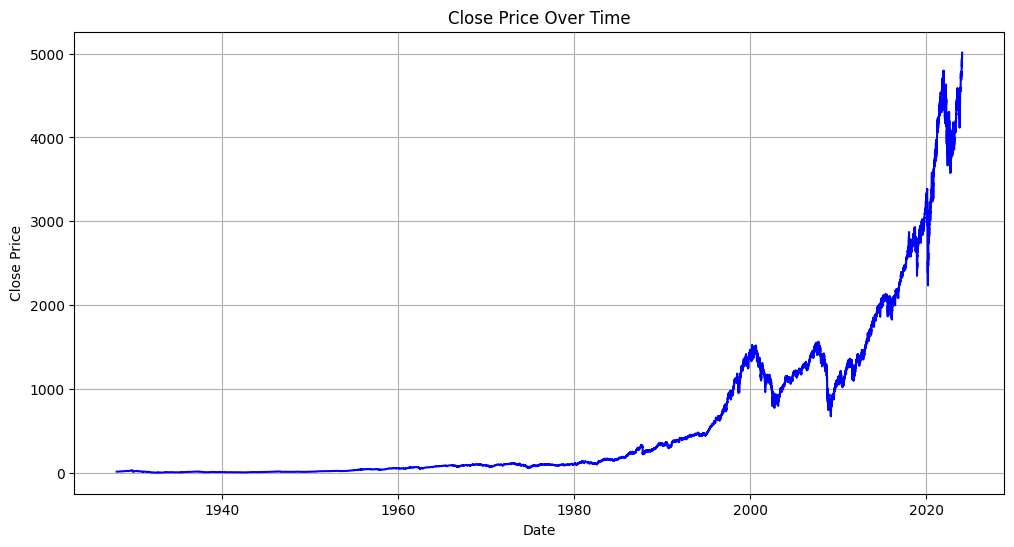

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

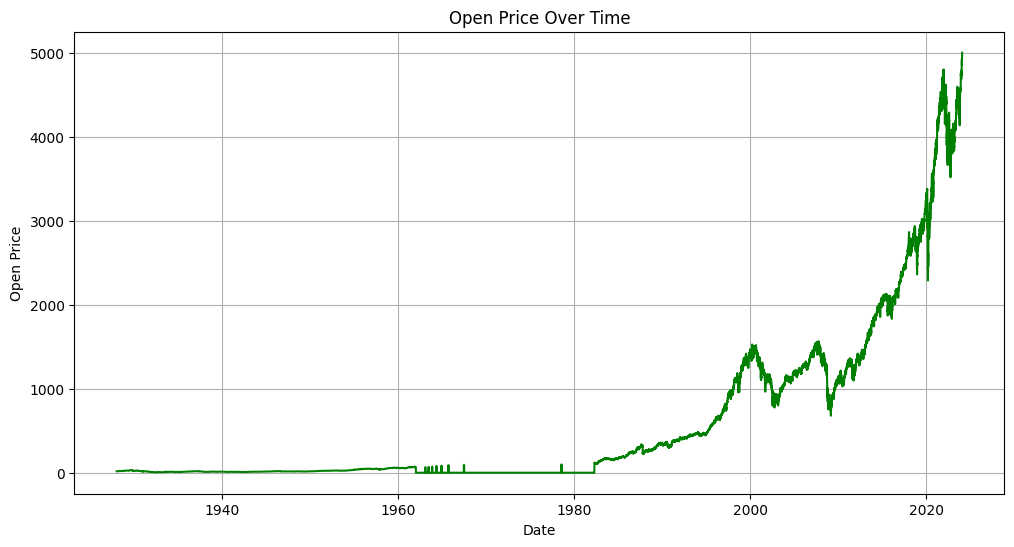

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], color='green')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

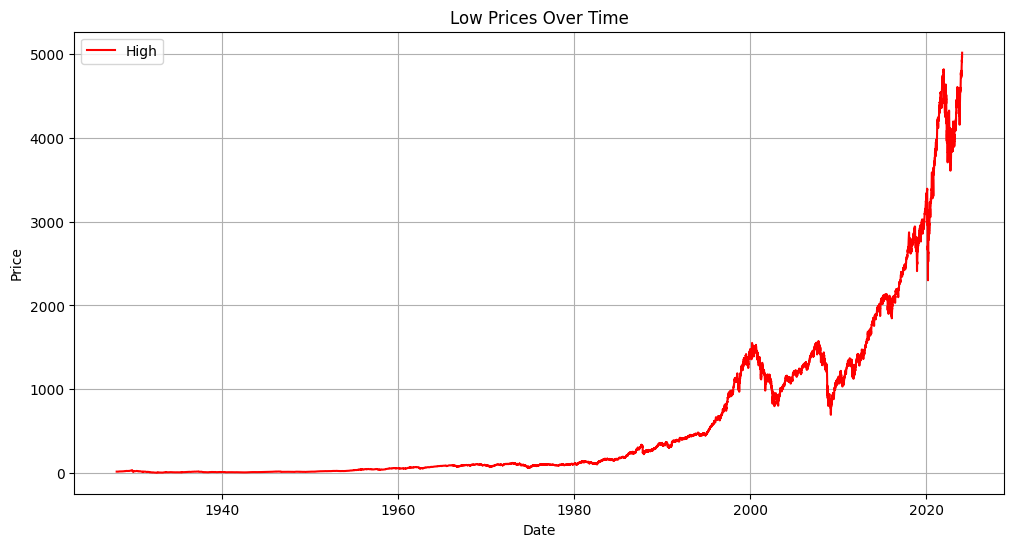

In [ ]:
# Plotting High Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['High'], label='High', color='red')
plt.title('Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

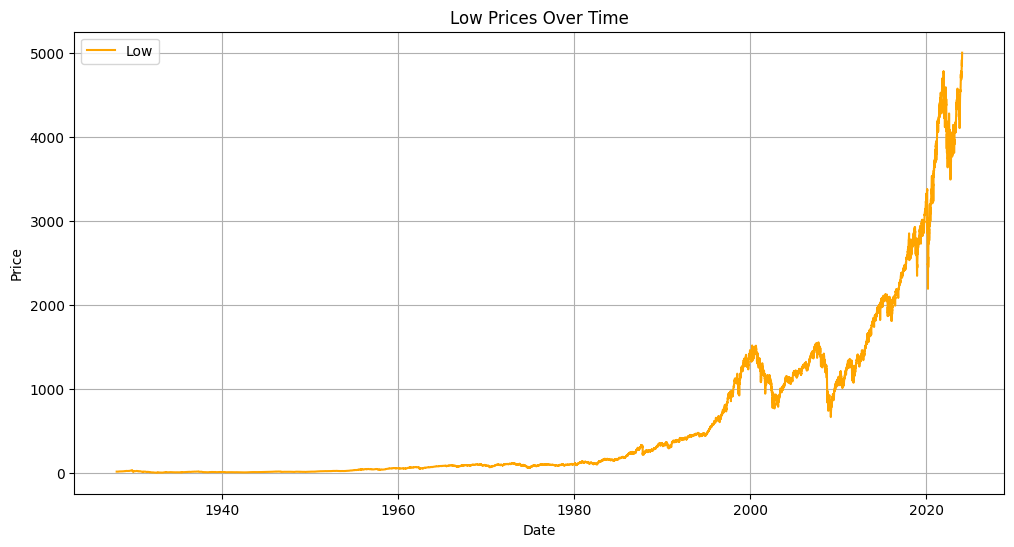

In [ ]:
# Plotting Low Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Low'], label='Low', color='orange')
plt.title('Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


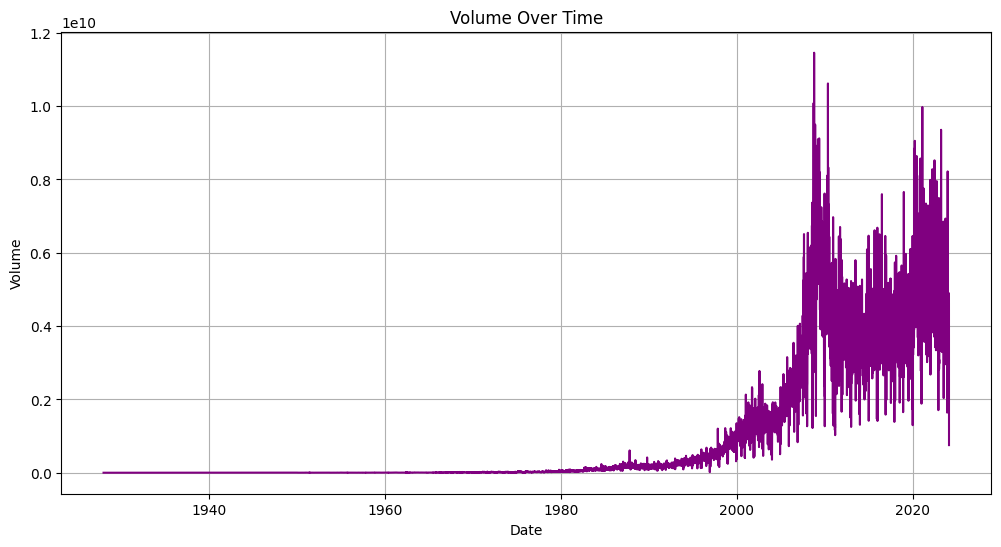

In [ ]:
# Plotting Volume
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], color='purple')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

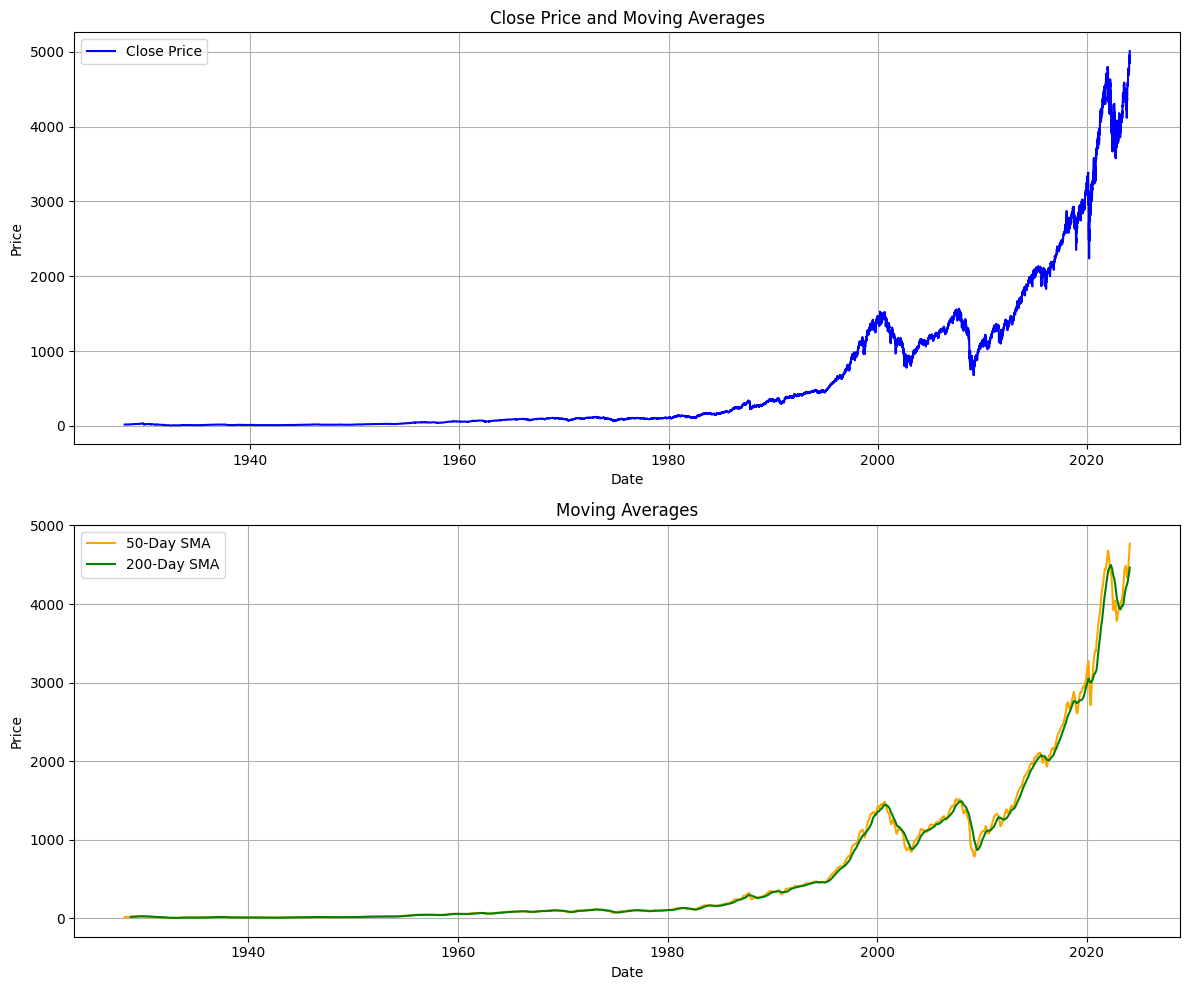

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Moving Averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Plotting Moving Averages on subplots
plt.figure(figsize=(12, 10))

# Close Price Plot
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Moving Averages Plot
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['Date'], data['SMA_200'], label='200-Day SMA', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


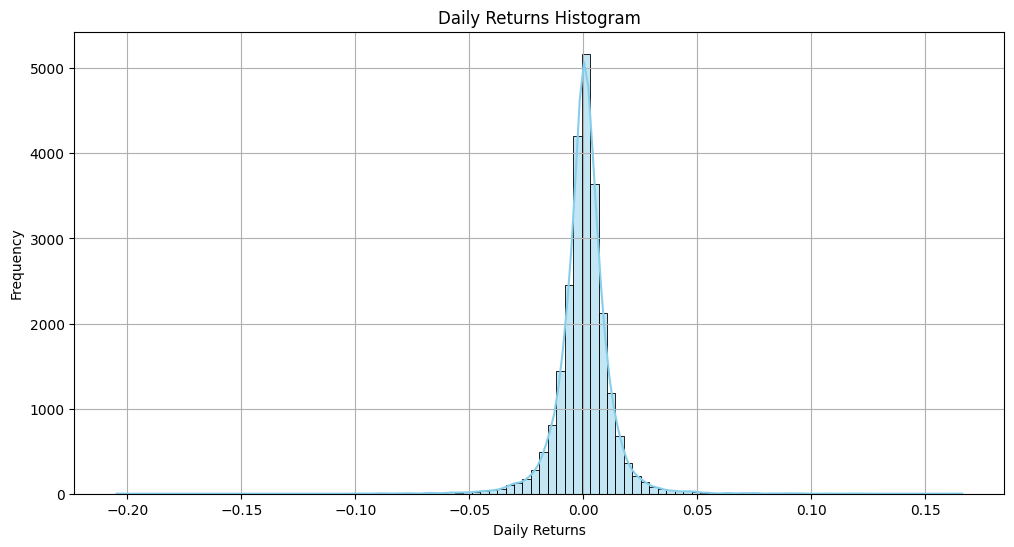

Descriptive Statistics of Daily Returns:
count    24142.000000
mean         0.000306
std          0.011962
min         -0.204669
25%         -0.004563
50%          0.000485
75%          0.005464
max          0.166096
Name: Daily_Return, dtype: float64


In [ ]:
data['Daily_Return'] = data['Close'].pct_change()

# Plotting Daily Returns Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Daily_Return'].dropna(), bins=100, color='skyblue', kde=True)
plt.title('Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Descriptive Statistics of Daily Returns
print("Descriptive Statistics of Daily Returns:")
print(data['Daily_Return'].describe())

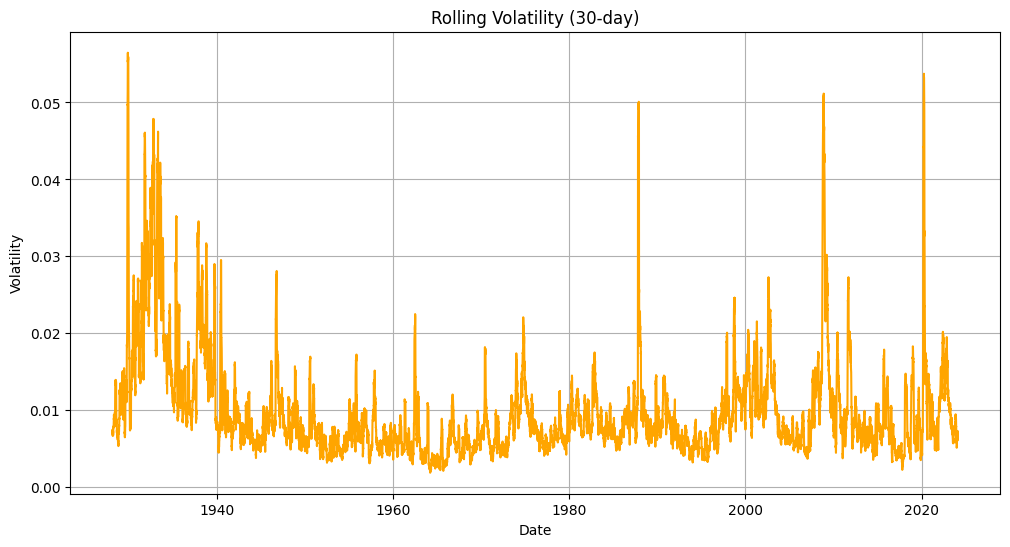

In [ ]:
window = 30
data['Volatility'] = data['Daily_Return'].rolling(window).std()

# Plotting Volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Date'],data['Volatility'], color='orange')
plt.title('Rolling Volatility (30-day)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

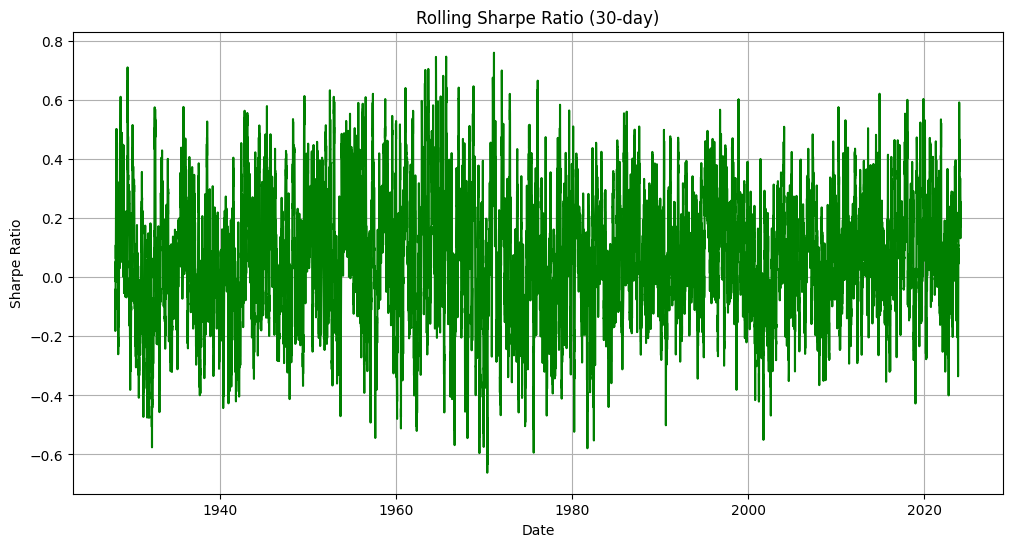

In [ ]:
risk_free_rate = 0
data['Sharpe_Ratio'] = (data['Daily_Return'].rolling(window).mean() - risk_free_rate) / data['Volatility']

# Plotting Sharpe Ratio
plt.figure(figsize=(12, 6))
plt.plot(data['Date'],data['Sharpe_Ratio'], color='green')
plt.title('Rolling Sharpe Ratio (30-day)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

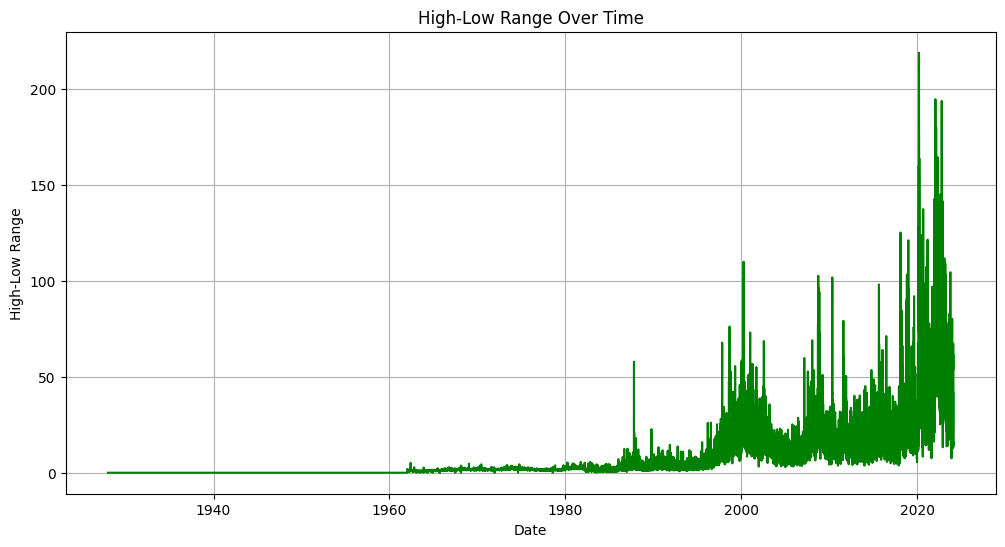

In [ ]:
# Plotting High-Low Range Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['High'] - data['Low'], color='green')
plt.title('High-Low Range Over Time')
plt.xlabel('Date')
plt.ylabel('High-Low Range')
plt.grid(True)
plt.show()